# PMOIRED example #3: AX Cir 

binary search *à la* [CANDID](https://github.com/amerand/CANDID). Results are currently slightly different as accounting for bandwidth smearing in PMOIRED is still not working properly...

*https://github.com/amerand/PMOIRED - Antoine Mérand (amerand@eso.org)*

In [1]:
%pylab notebook
try:
    # -- global installation
    import pmoired
    print('global')
except:
    # -- local installation
    import sys
    sys.path = ['../pmoired'] + sys.path
    import __init__ as pmoired
    print('local')
import os

from importlib import reload

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib
[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
local


loadOI: loading AXCir.oifits
  > insname: "PIONIER_Pnat(1.6135391/1.7698610)" targname: "AX_CIR" pipeline: ""
  > MJD: [56487.97305633923, 56487.97393179347, 56487.97480311718, 56487.97567612686, 56487.97654849956, 56487.98993815819, 56487.990812632524, 56487.99168235045, 56487.992556167876, 56487.993429625145, 56488.00573612476, 56488.006608098876, 56488.00747989074, 56488.008355897415, 56488.009225301685, 56488.01009631798, 56488.01097278044, 56488.01184104877, 56488.01271335528, 56488.01359114645, 56488.03308009381, 56488.033590092076, 56488.034099806384, 56488.034609943774, 56488.035122056725, 56488.03563601018, 56488.03614173218, 56488.03664971952, 56488.0371620554, 56488.037670965175, 56488.04667515908, 56488.047189387165, 56488.04770007059, 56488.04821183202, 56488.04872313115, 56488.04923333806, 56488.04974387007, 56488.05025742777, 56488.05077371096, 56488.05128556907, 56488.0586200955, 56488.059128990484, 56488.059639380604, 56488.060149933954, 56488.060659175615, 56488.06116

<IPython.core.display.Javascript object>


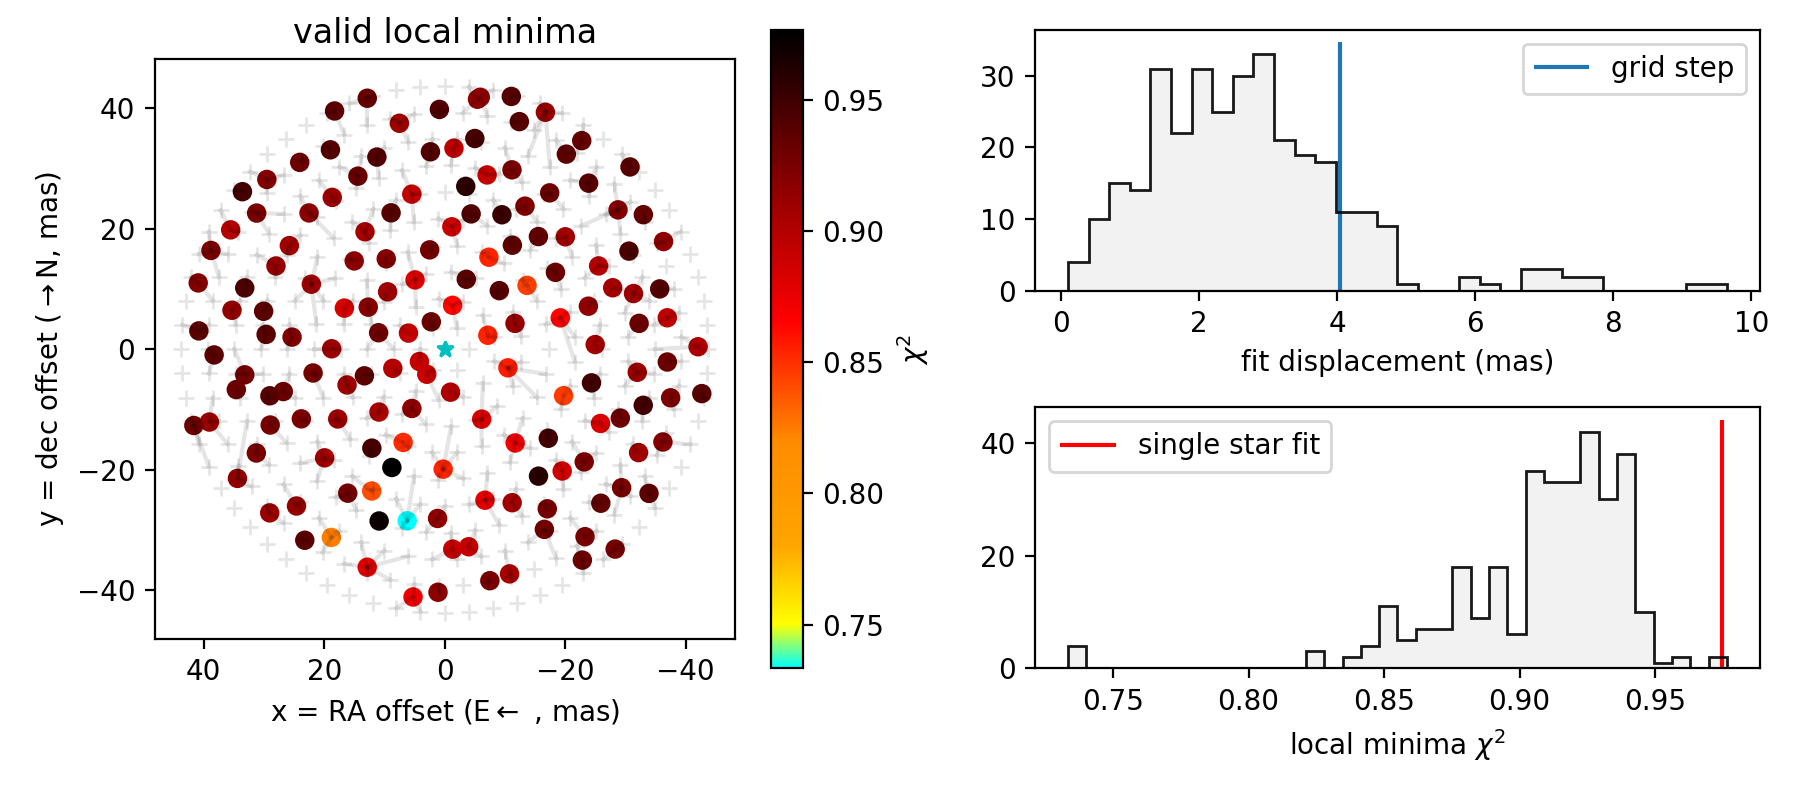

running 367 fits...
initial estimate: 1412.8 fit per minute using 8 threads
it took 58.1s, 379 fit per minute on average (158ms per fit)
    72684 calls, 198.0 calls per fit, 0.80ms per call
  - removing 7 fits which did not converge properly
  - removing 40 fits outside search range
154 unique minima from 320 fits
best fit chi2 = 0.733
{
   '*,f': 1.0 ,
   'c,ud': 0.0 ,
   'c,f': 0.00853, # +- 0.00039
   'c,x': 6.226, # +- 0.059
   'c,y': -28.503, # +- 0.078
   '*,ud': 0.8278, # +- 0.0078
}
separation: 29.1754 mas
PA: 167.68 degress


In [2]:
# reload(pmoired.oicandid)
# reload(pmoired.oimodels)
# reload(pmoired.oifits)
# reload(pmoired)
# pmoired.oimodels.SMEA=0

data = pmoired.OI('AXCir.oifits')
data.setupFit({'obs':['V2', 'T3PHI']})
data.candidFitMap(fitAlso=['*,ud'])

showing best fit model


<IPython.core.display.Javascript object>


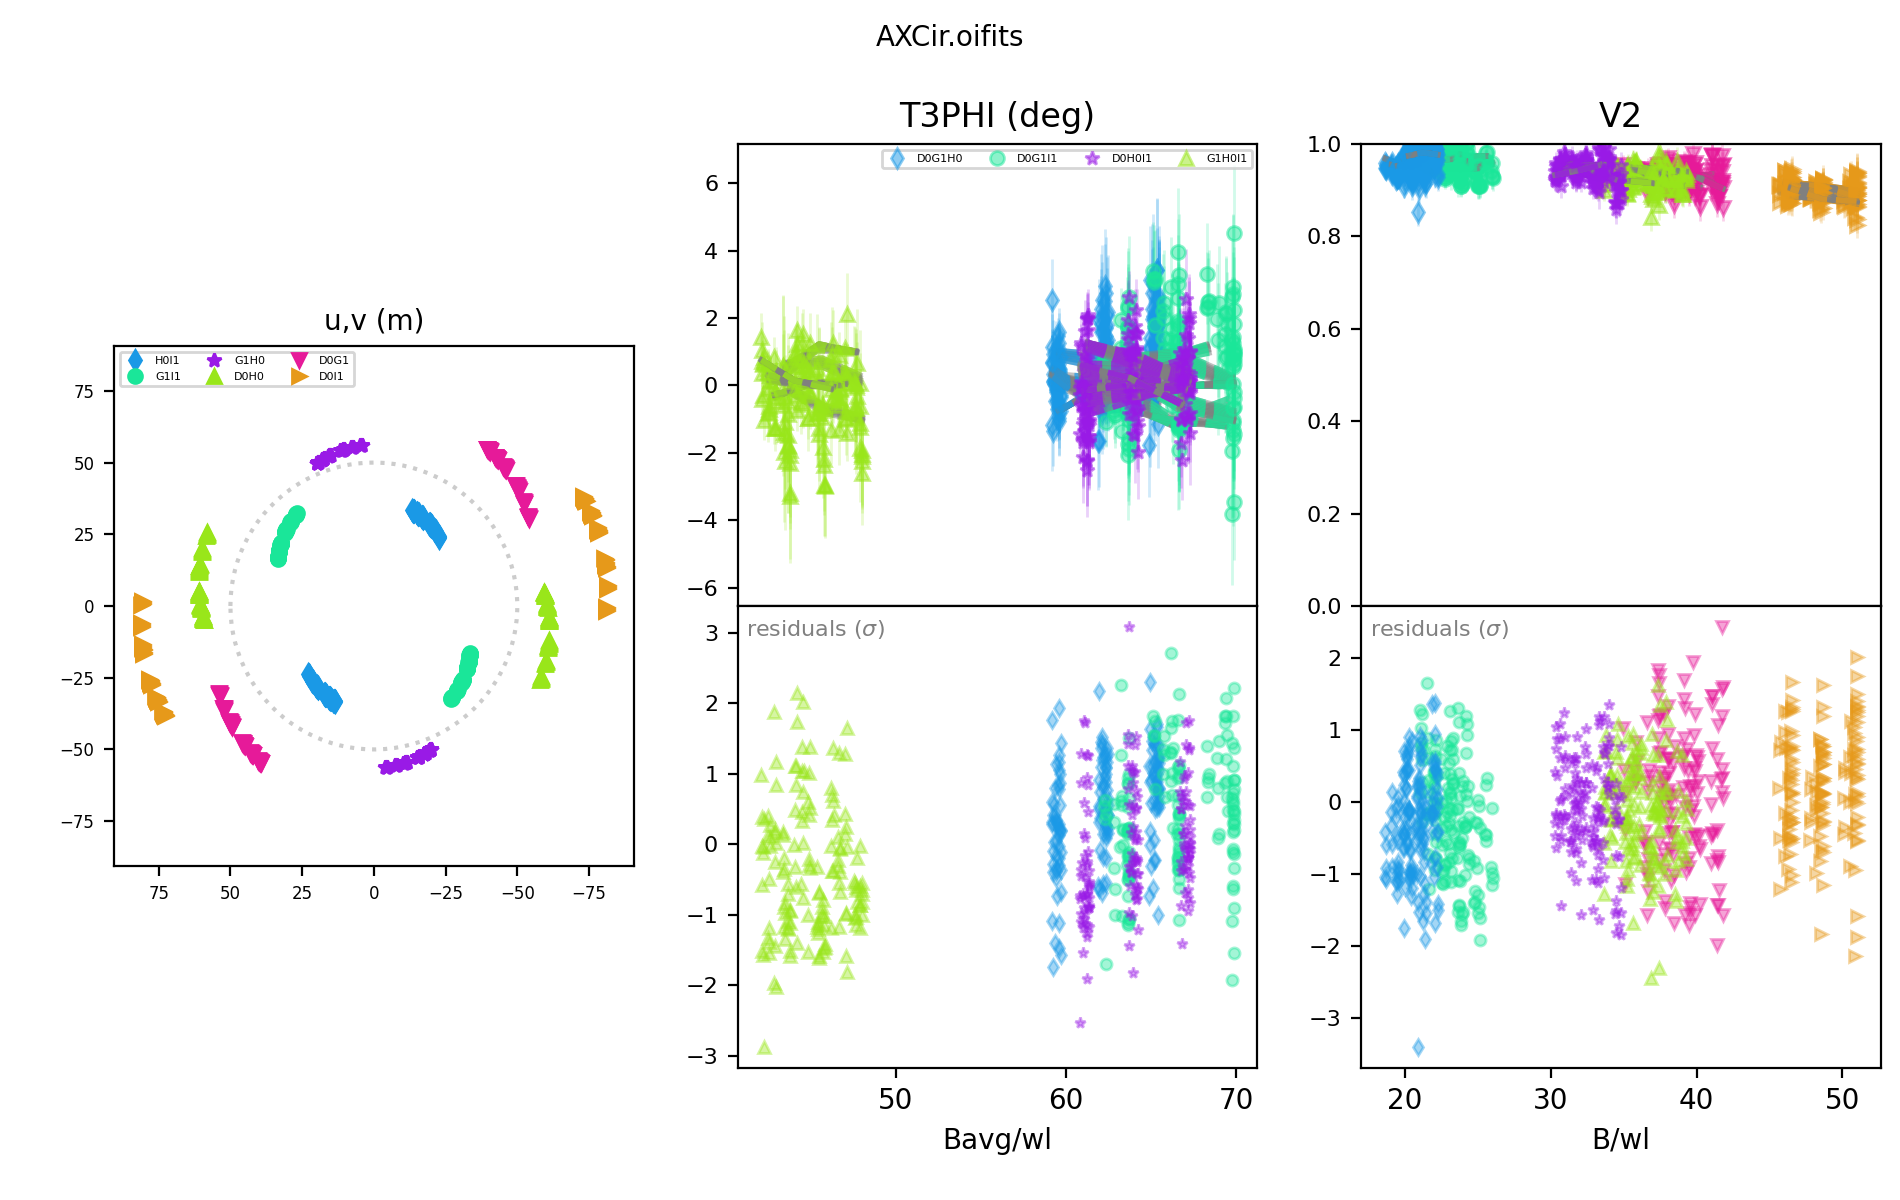

done in 2.35s


In [3]:
data.show()

running 300 fits...
one fit takes ~0.36s using 8 threads
it took 16.2s, 0.05s per fit on average
using 300 fits out of 300 (sigma clipping 4.50)
{'*,f' :1.0
'*,ud': 0.8281, # +/- 0.0071
'c,f' : 0.00852, # +/- 0.00038
'c,ud':0.0
'c,x' : 6.221, # +/- 0.067
'c,y' : -28.500, # +/- 0.074
}
Correlations (%)  >=90 >=80 >=70 >=50 >=20 <20%
           0   1   2   3 
  0: c,f ###   1 -12 -65   4 
  1: c,x   1 ###  -5  -4 -25 
  2: c,y -12  -5 ###  17   9 
  3:*,ud -65  -4  17 ###   5 


<IPython.core.display.Javascript object>


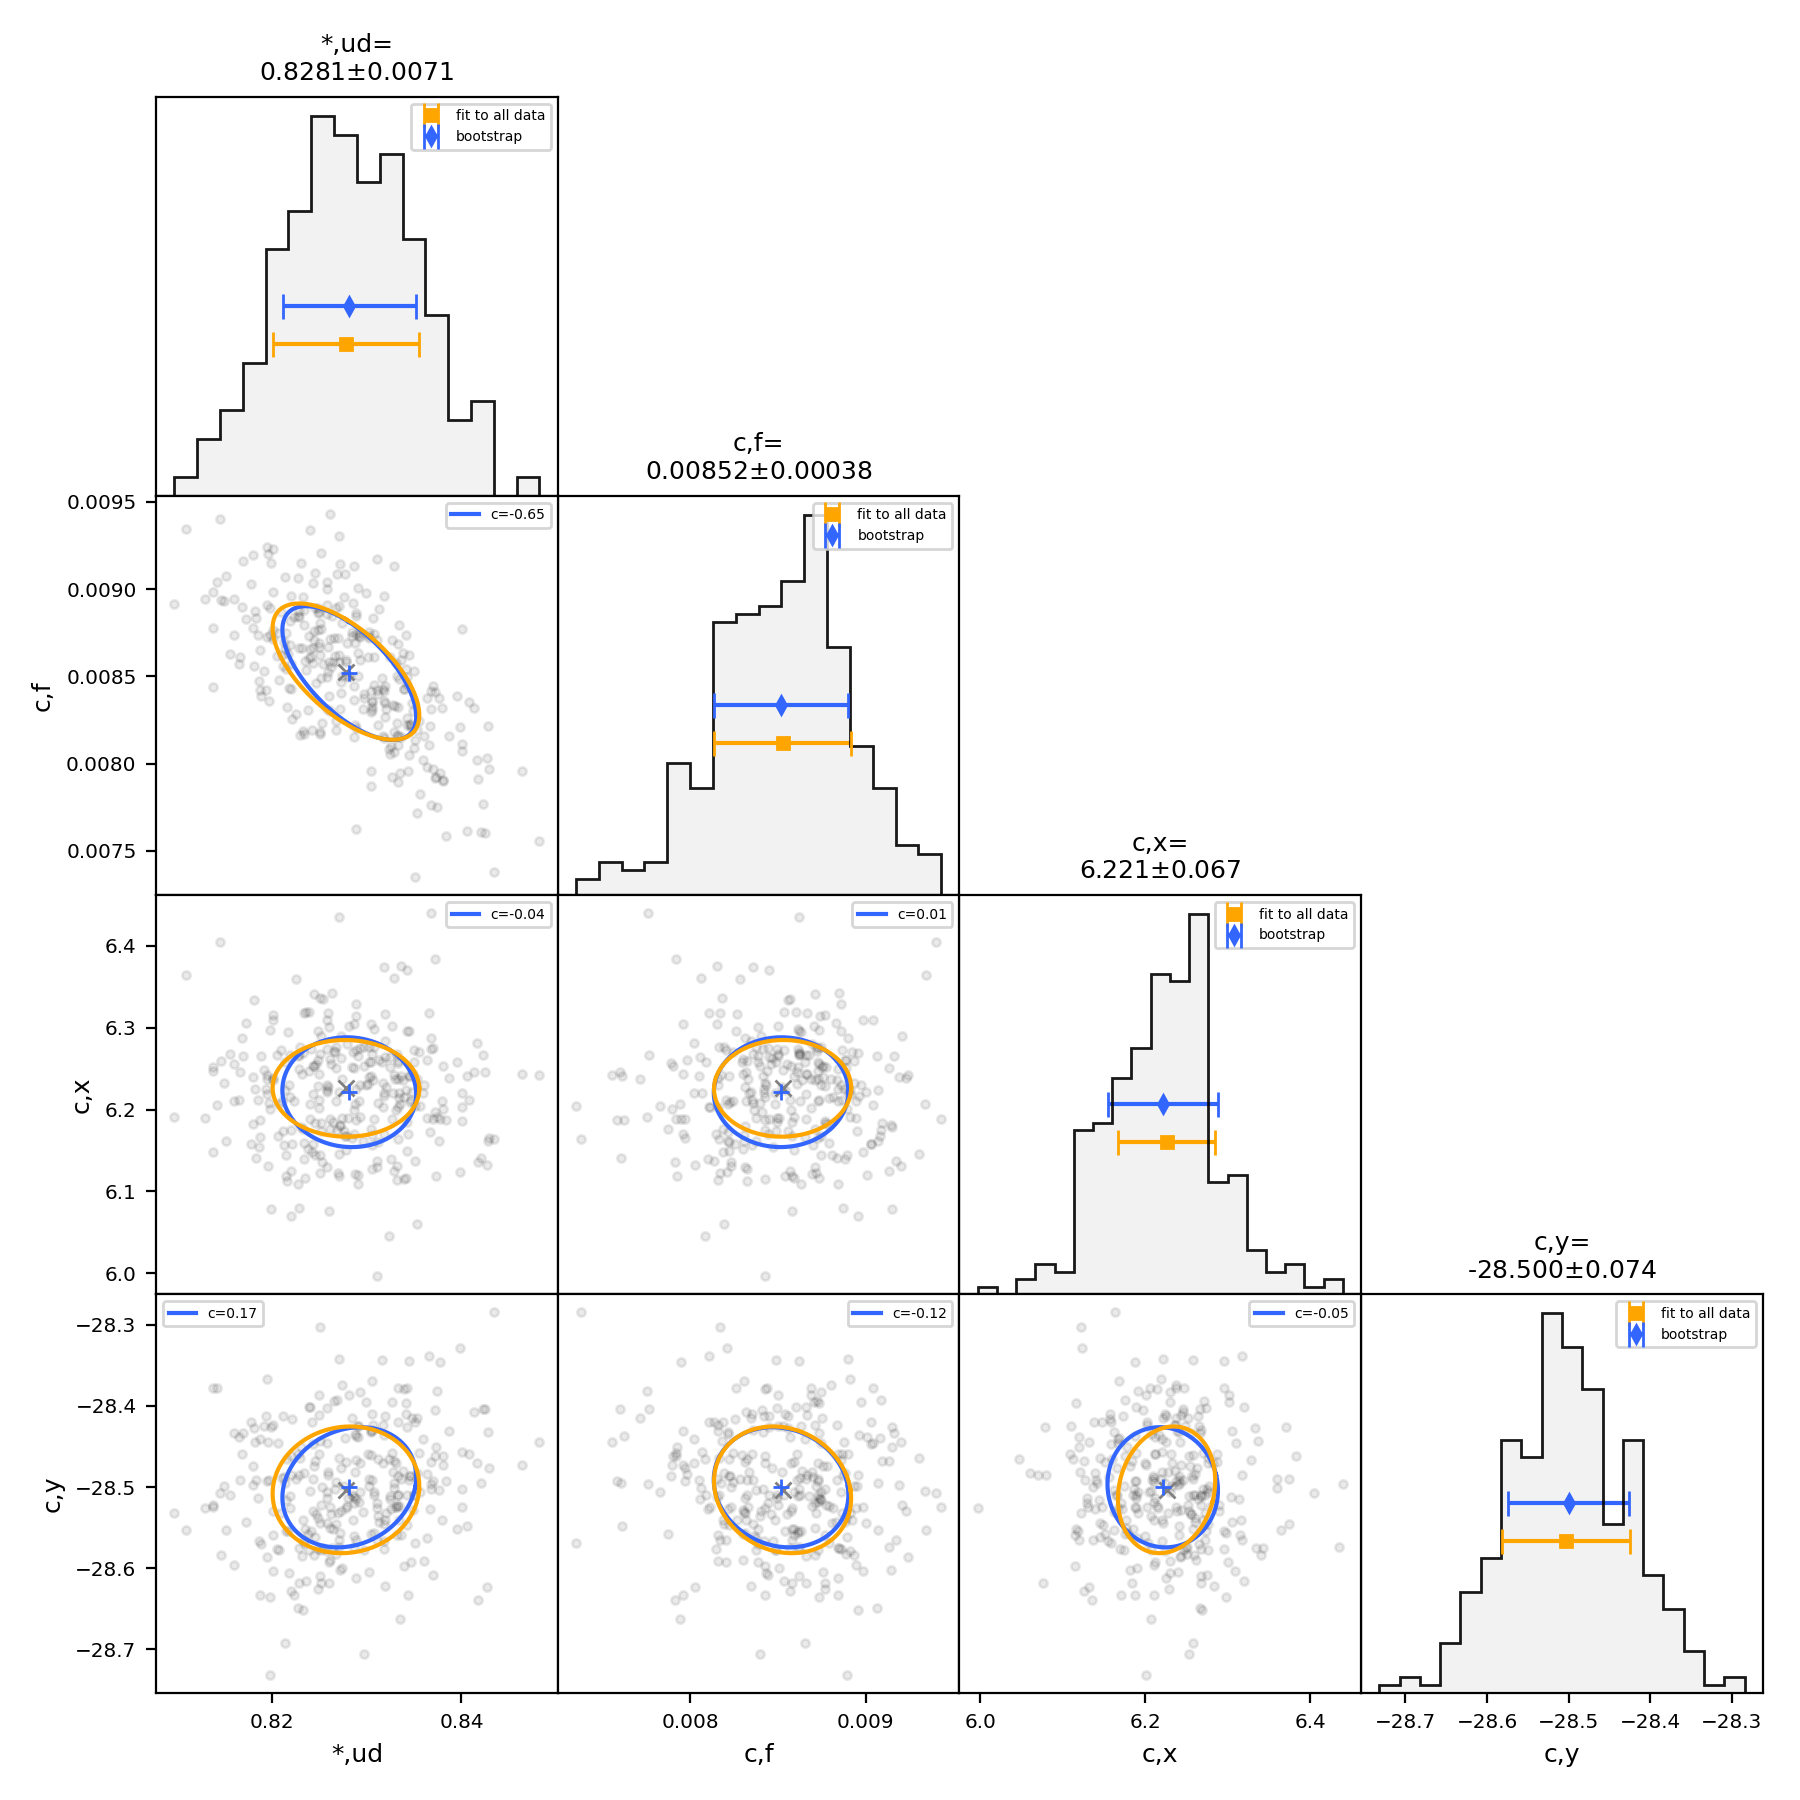

ellipse (emin, emax, PA) for c,x/c,y: 0.0665 0.0745 -13.7


In [4]:
data.bootstrapFit(300)
data.showBootstrap()

# Under development

[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
loadOI: loading AXCir.oifits
  > insname: "PIONIER_Pnat(1.6135391/1.7698610)" targname: "AX_CIR" pipeline: ""
  > MJD: [56487.97305633923, 56487.97393179347, 56487.97480311718, 56487.97567612686, 56487.97654849956, 56487.98993815819, 56487.990812632524, 56487.99168235045, 56487.992556167876, 56487.993429625145, 56488.00573612476, 56488.006608098876, 56488.00747989074, 56488.008355897415, 56488.009225301685, 56488.01009631798, 56488.01097278044, 56488.01184104877, 56488.01271335528, 56488.01359114645, 56488.03308009381, 56488.033590092076, 56488.034099806384, 56488.034609943774, 56488.035122056725, 56488.03563601018, 56488.03614173218, 56488.03664971952, 56488.0371620554, 56488.037670965175, 56488.04667515908, 56488.047189387165, 56488.04770007059, 56488.04821183202, 56488.04872313115, 56488.04923333806, 56488.04974387007, 56488.05025742777, 56488.05077371096, 56488.05128556907, 56488.05

<IPython.core.display.Javascript object>


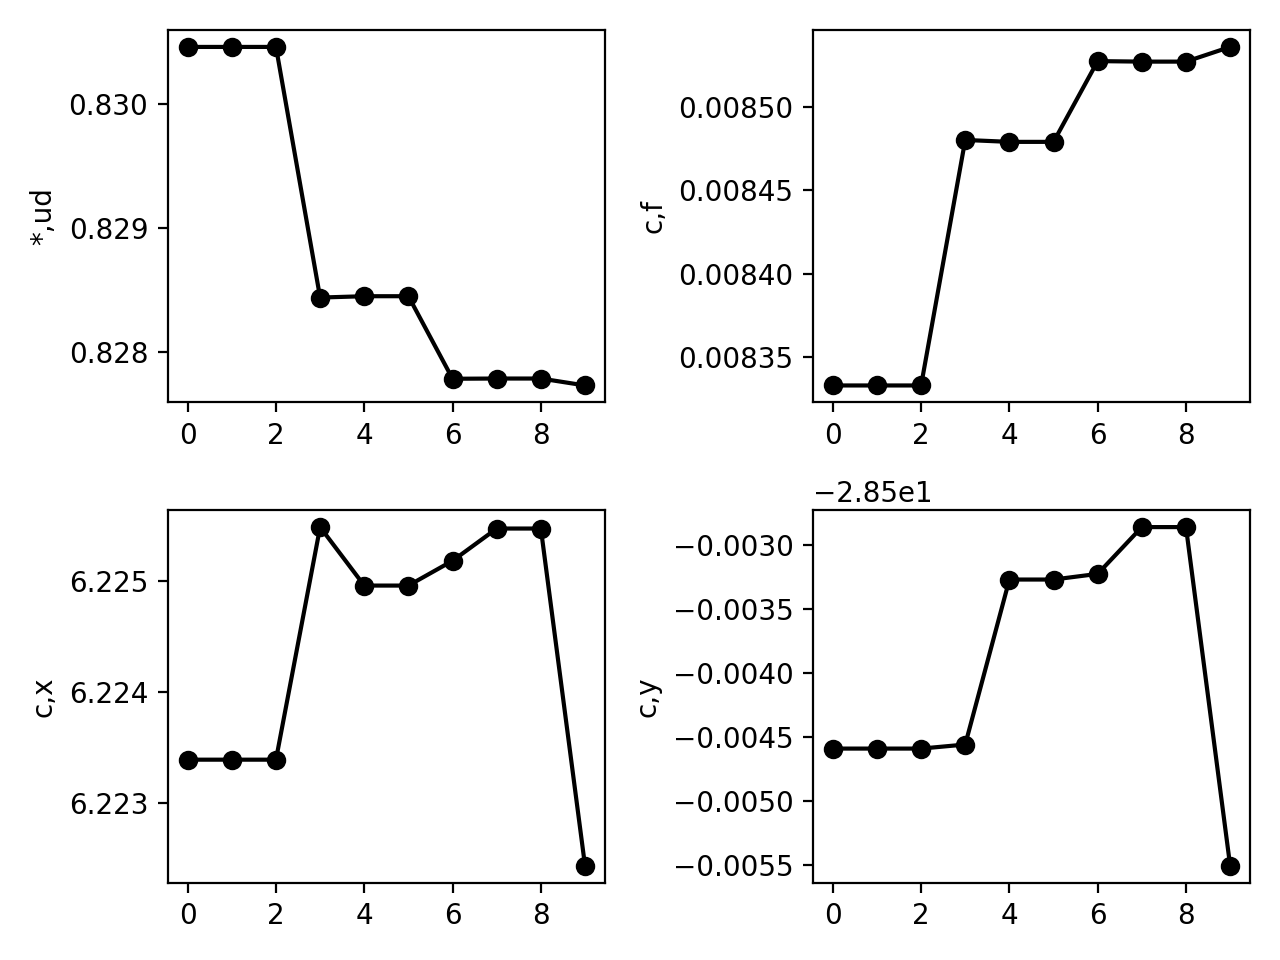

<IPython.core.display.Javascript object>


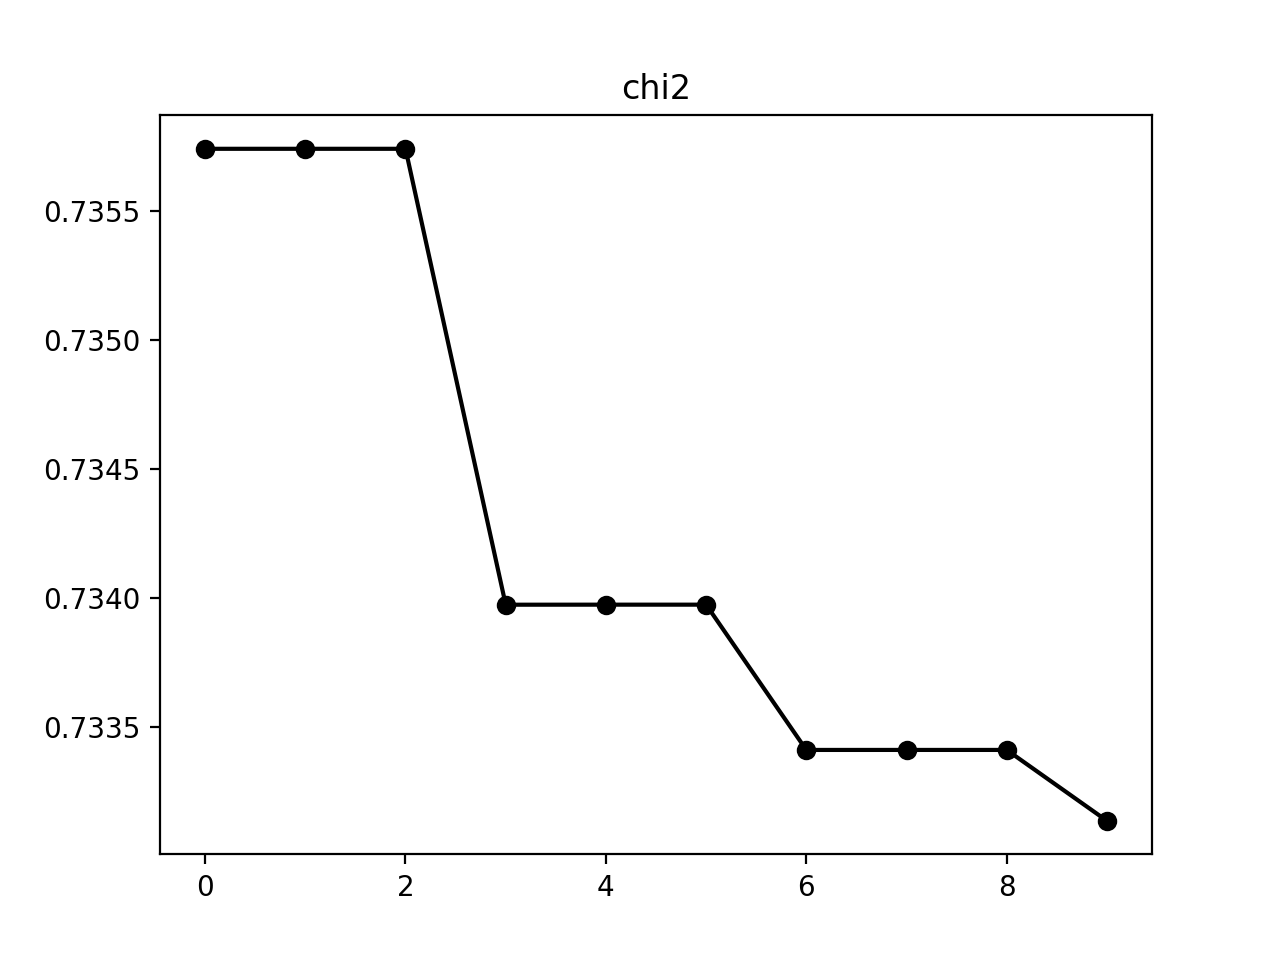

Text(0.5, 1.0, 'chi2')

In [5]:
reload(pmoired.oicandid)
reload(pmoired.oimodels)
reload(pmoired.oifits)
reload(pmoired)

data = pmoired.OI('AXCir.oifits')
data.setupFit({'obs':['V2', 'T3PHI']})

# -- check effects of bandwidth smearing
SMEA = np.arange(10)
#SMEA = [5]
res = []
for s in SMEA:
    pmoired.oimodels.SMEA=s
    p = {'*,ud':0.83, '*,f':1.0, 'c,ud':0.0, 'c,x':6., 'c,y':-28.3, 'c,f':0.009}
    data.doFit(p, doNotFit=['*,f', 'c,ud'], verbose=0)
    res.append(data.bestfit)
plt.close(10)
plt.figure(10)
#plt.plot(SMEA, [r['chi2'] for r in res])
for i,k in enumerate(['*,ud', 'c,f', 'c,x', 'c,y']):
    plt.subplot(2,2,i+1)
    plt.plot(SMEA, [r['best'][k] for r in res], '-ok')
    plt.ylabel(k)
plt.tight_layout()

plt.close(11)
plt.figure(11)
plt.plot(SMEA, [r['chi2'] for r in res], '-ok')
plt.title('chi2')

#print(np.sqrt(data.bestfit['best']['c,x']**2+data.bestfit['best']['c,y']**2))

<IPython.core.display.Javascript object>


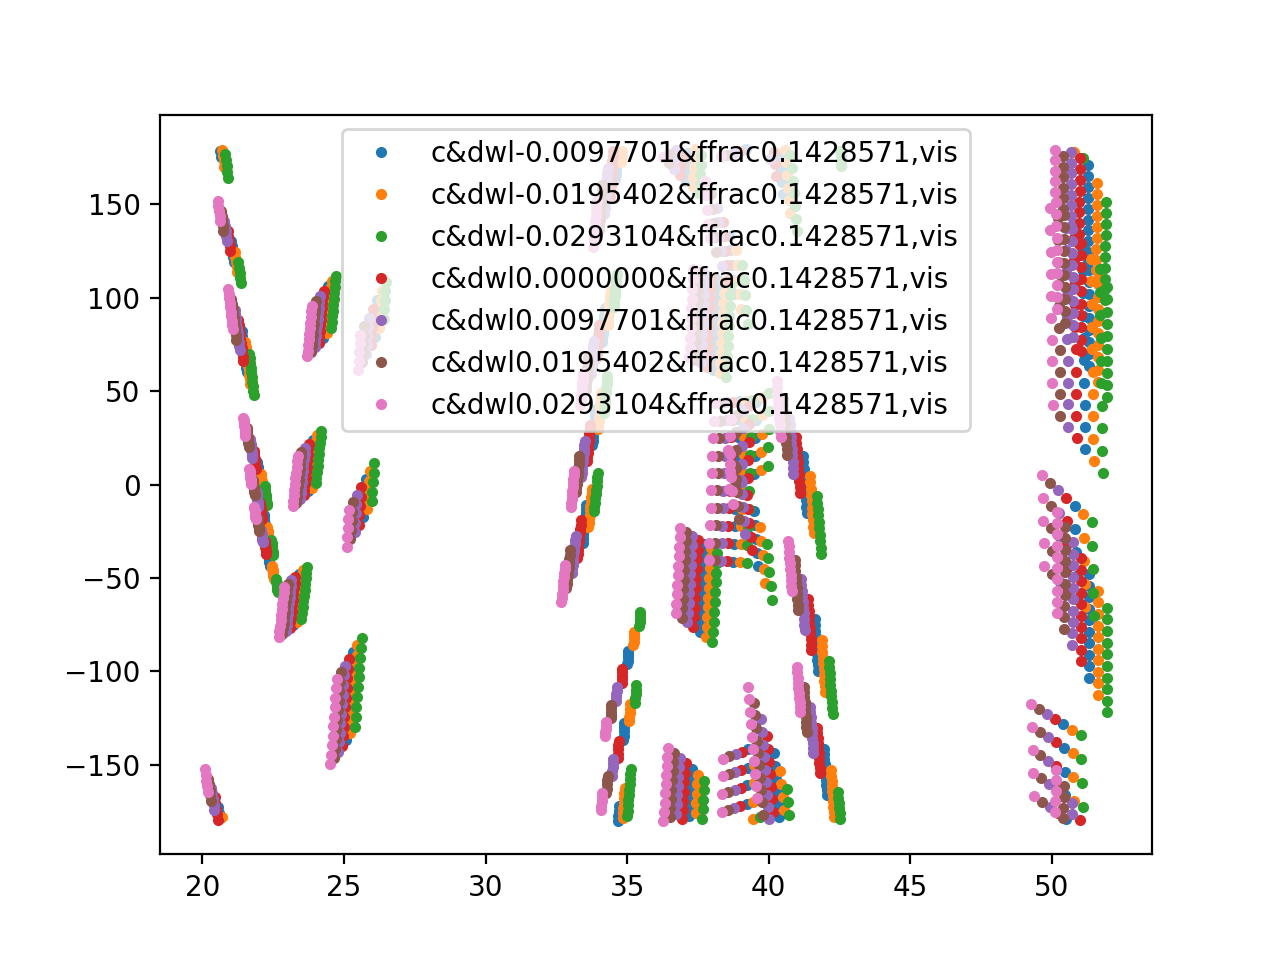

In [6]:
K = sorted(list(filter(lambda x: x.startswith('c') and x.endswith(',vis'), data._model[0]['MODEL'].keys())))

plt.close(12); plt.figure(12)
for k in K:
    plt.plot(data._model[0]['MODEL'][k]['all']['B/wl'][:,0], data._model[0]['MODEL'][k]['all']['PHI'][:,0], '.',
            label=k)
plt.legend()